In [ ]:
import matplotlib.pyplot as plt
from pyvrp import Model, read
from pyvrp.PenaltyManager import PenaltyParams
from pyvrp.plotting import (
    plot_coordinates,
    plot_instance,
    plot_result,
    plot_route_schedule,
)
from pyvrp.solve import SolveParams
from pyvrp.stop import MaxIterations
from typing import NamedTuple

In [10]:
# Either we can directly read the data which is in DIMACS format
instance = read("data/RC208_small.vrp")
model = Model.from_data(instance)
#
# OR
# We specify the instance ourselves

# model = Model()

# class VRPData(NamedTuple):
#     string_id: str
#     type: str
#     x: float
#     y: float
#     demand: float
#     pickup_demand: float
#     delivery_demand: float
#     ready_time: float
#     due_date: float
#     service_time: float

# data: list[VRPData] = [
#     VRPData("S0","f",40.0,50.0,0.0,0,0,0.0,1236.0,0.0),
#     VRPData("S1","f",77.0,52.0,0.0,0,0,0.0,1236.0,0.0),
#     VRPData("S3","f",57.0,82.0,0.0,0,0,0.0,1236.0,0.0),
#     VRPData("S16","f",48.0,8.0,0.0,0,0,0.0,1236.0,0.0),
#     VRPData("S20","f",93.0,43.0,0.0,0,0,0.0,1236.0,0.0),
#     VRPData("C98","c",58.0,75.0,20.0,5,15,181.0,247.0,90.0),
#     VRPData("C78","c",88.0,35.0,20.0,13,7,667.0,731.0,90.0),
#     VRPData("C4","c",42.0,68.0,10.0,4,6,584.0,656.0,90.0),
#     VRPData("C13","c",22.0,75.0,30.0,22,8,1042.0,1106.0,90.0),
#     VRPData("C95","c",62.0,80.0,30.0,7,23,274.0,330.0,90.0),
#     VRPData("C100","c",55.0,85.0,20.0,8,12,744.0,798.0,90.0),
#     VRPData("C54","c",42.0,10.0,40.0,31,9,810.0,868.0,90.0),
#     VRPData("C27","c",23.0,52.0,10.0,6,4,263.0,311.0,90.0),
#     VRPData("C89","c",63.0,58.0,10.0,1,9,929.0,989.0,90.0),
#     VRPData("C96","c",60.0,80.0,10.0,3,7,177.0,243.0,90.0),
# ]

# vehicle_capacity = 200.0
# velocity = 1.0



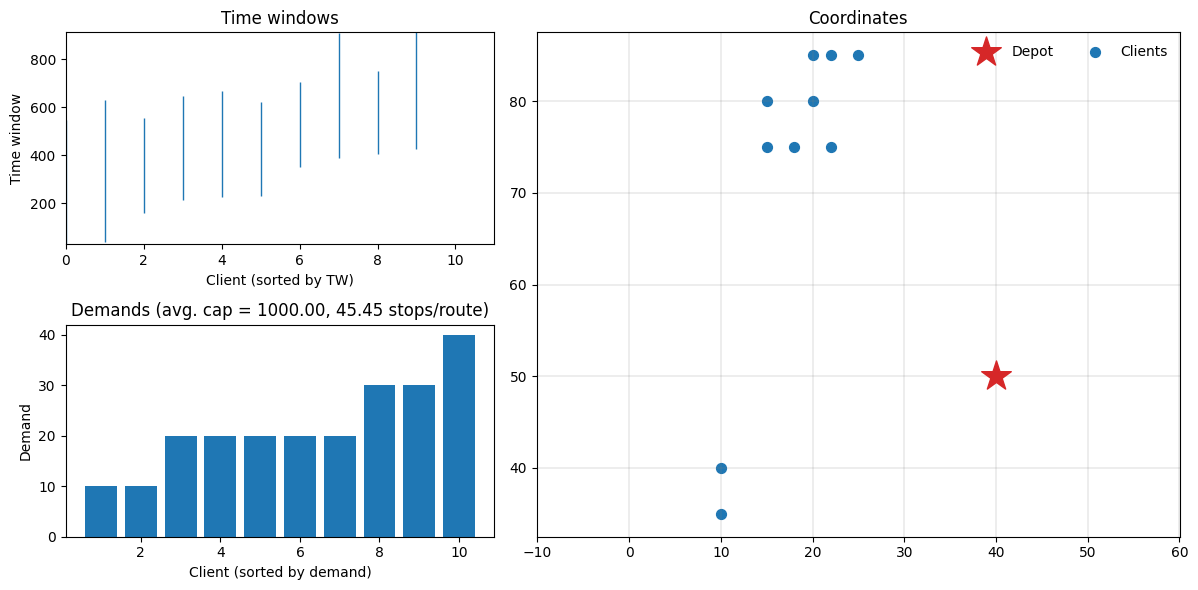

In [11]:
fig = plt.figure(figsize=(12, 6))
plot_instance(instance, fig)

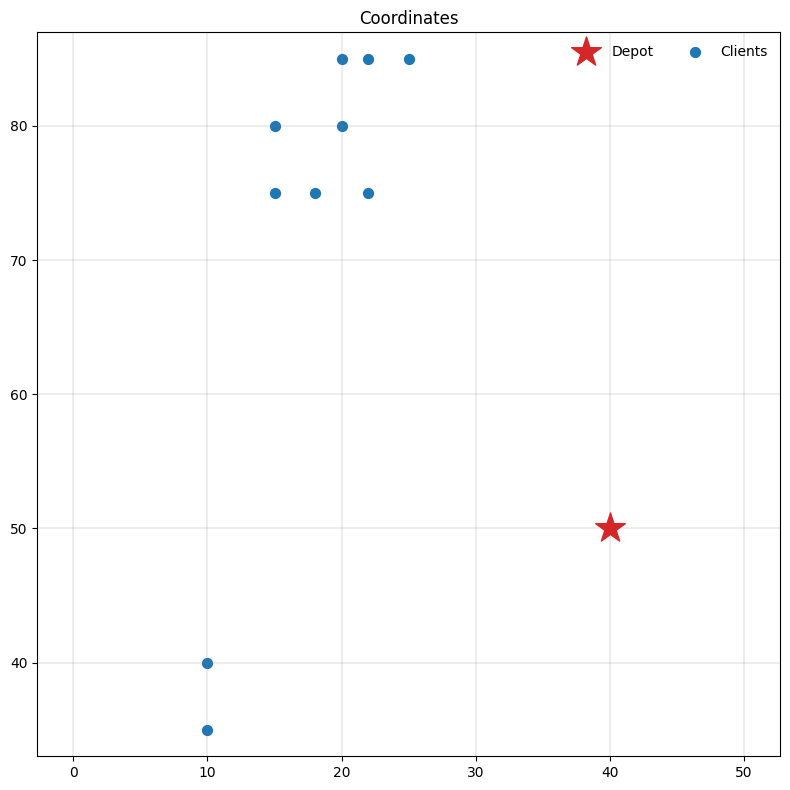

In [4]:
_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(instance, ax=ax)
plt.tight_layout()

In [ ]:
params = SolveParams(
    penalty=PenaltyParams(
        unit_fuel_cost=1.0,
        unit_emission_cost=1.0,
        velocity=1,
        congestion_factor=1,
        wage_per_hour=1.0,
        min_hours_paid=8.0,
    )
)
result = model.solve(stop=MaxIterations(1000), seed=42, display=True, params=params)
print(result)

PyVRP v0.12.0a0

Solving an instance with:
    1 depot
    10 clients
    25 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best
H     500      3s |  53      148      135 |  47      135      135
     1000      8s |  44      152      135 |  39      135      135

Search terminated in 7.75s after 1000 iterations.
Best-found solution has cost 135.

Solution results
    # routes: 1
     # trips: 1
   # clients: 10
   objective: 135
    distance: 135
    duration: 235
# iterations: 1000
    run-time: 7.75 seconds


Routes
------
Route #1: 2 4 1 3 5 8 6 7 10 9



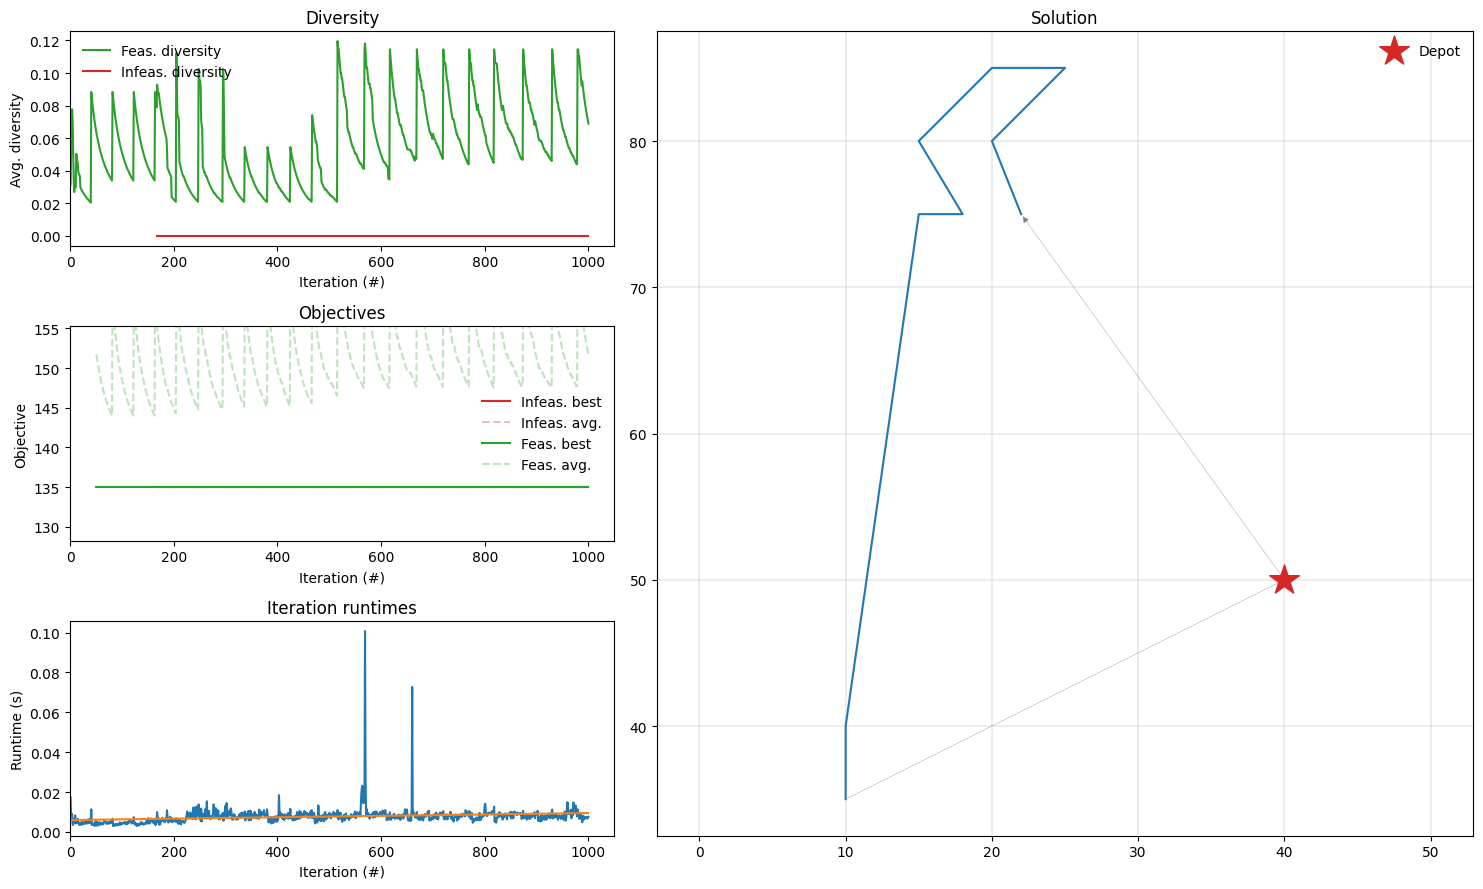

In [6]:
fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig=fig)
fig.tight_layout()